# Определение перспективного тарифа для телеком-компании

### Шаг 1. Обзор данных

Импортируем необходимые библиотеки. Прочитаем файлы с данными для анализа. Выведем на экран первые 15 строк и общую информацию о каждой таблице:

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
df_calls = pd.read_csv('/datasets/calls.csv') 
df_tariffs = pd.read_csv('/datasets/tariffs.csv') 
df_messages = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv') 
df_users = pd.read_csv('/datasets/users.csv') 

In [4]:
df_calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
df_tariffs.head(15)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [8]:
df_messages.head(15)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [9]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
df_internet.head(15)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [11]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [12]:
df_users.head(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [13]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Как мы видим, данные неоднородны по размеру. В некоторых таблицах есть пропуски, а так же типы данных в некоторых колонках не верны. Выполним предобработку данных.

### Шаг 2. Подготовка данных

#### Шаг 2.1 Предобработка данных

<b>Приведение данных к нужным типам.</b>

Во всех таблицах, кроме df_tariffs, есть столббцы с датами. Нужно заменить тип данных в этих столбцах с object на datetime.
Столбец churn_date в таблице с пользователями оставим без изменений, так как в нем  много пропусков из-за того, что клиенты до сих пор пользуются тарифом (привести столбец  к нужному типу не получится не избавившись от пропусков. Нам эта колонка в анализе не нужна, поэтому оставим и пропуски и тип данных без изменений).

In [14]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y.%m.%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y.%m.%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y.%m.%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y.%m.%d')

<b>Проверка на дубликаты.</b>

In [15]:
df_calls.duplicated().sum()

0

In [16]:
df_messages.duplicated().sum()

0

In [17]:
df_internet.duplicated().sum()

0

In [18]:
df_users.duplicated().sum()

0

Дубликатов нет.

<b>Исправление ошибок.</b>

В таблице df_internet есть столбец "Unnamed: 0", который повторяет индексы строк. Удалим его.

In [19]:
del df_internet['Unnamed: 0']

Проверим результат операций по предобработке данных.

In [20]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [21]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [22]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [23]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


#### Шаг 2.2 Вычисление параметров для каждого пользователя

Необходимо вычислить для каждого пользователя:

*количество сделанных звонков и израсходованных минут разговора по месяцам;

*количество отправленных сообщений по месяцам;

*объем израсходованного интернет-трафика по месяцам;

*помесячную выручку с каждого пользователя.

<b>Количество сделанных звонков и израсходованных минут разговора по месяцам.</b>

In [24]:
#Добавим в таблицу df_calls столбец с месяцем звонка
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month 
#Добавим столбец с длительностью звонка в минутах (округлим значения до минут в столбце duration, так как согласно условию «Мегалайн» всегда округляет секунды до минут)
df_calls['calls_min'] = np.ceil(df_calls['duration'])
df_calls.head()

,id,call_date,duration,user_id,month,calls_min
0,1000_0,2018-07-25,0.00,1000,7,0.0
1,1000_1,2018-08-17,0.00,1000,8,0.0
2,1000_2,2018-06-11,2.85,1000,6,3.0
3,1000_3,2018-09-21,13.80,1000,9,14.0
4,1000_4,2018-12-15,5.18,1000,12,6.0


In [25]:
#Сгруппируем данные по user_id и month, применим методы к соответствующим значениям.
df_calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], aggfunc={'call_date':"count", 'calls_min':sum}) 
df_calls_pivot.columns = ['calls_count', 'calls_duration']
df_calls_pivot.head()

calls_count  calls_duration
user_id month                             
1000    5               22           159.0
        6               43           172.0
        7               47           340.0
        8               52           408.0
        9               58           466.0

<b>Количество отправленных сообщений по месяцам.</b>

In [26]:
#Добавим в таблицу df_messages столбец с месяцем 
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month 

In [27]:
#Сгруппируем данные по user_id и month, применим методы к соответствующим значениям.
df_messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], aggfunc={'id':"count"}) 
df_messages_pivot.columns = ['messagess_count']
df_messages_pivot.head()

messagess_count
user_id month                 
1000    5                   22
        6                   60
        7                   75
        8                   81
        9                   57

<b>Объем израсходованного интернет-трафика по месяцам. </b>

In [28]:
#Добавим в таблицу df_internet столбец с месяцем 
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month 
#Добавим столбец с объемом израсходованного трафика в Гб (округлим значения) 
df_internet['internet_gb'] = np.ceil(df_internet['mb_used'] / 1024)
df_internet.head()

,id,mb_used,session_date,user_id,month,internet_gb
0,1000_0,112.95,2018-11-25,1000,11,1.0
1,1000_1,1052.81,2018-09-07,1000,9,2.0
2,1000_2,1197.26,2018-06-25,1000,6,2.0
3,1000_3,550.27,2018-08-22,1000,8,1.0
4,1000_4,302.56,2018-09-24,1000,9,1.0


In [29]:
#Сгруппируем данные по user_id и month, применим методы к соответствующим значениям.
df_internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], aggfunc={'internet_gb':sum}) 
df_internet_pivot.columns = ['internet_volume']
df_internet_pivot.head()

internet_volume
user_id month                 
1000    5                  4.0
        6                 49.0
        7                 28.0
        8                 27.0
        9                 26.0

<b> Помесячная выручка с каждого пользователя.</b> 

Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика.
Остаток умножем на значение из тарифного плана и прибавим абонентскую плату, соответствующую тарифному плану.

Для рассчета помесячной выручки объеденим все сводные таблицы и таблицу df_users.

In [55]:
# при помощи метода join объеденим сразу все сводные таблицы по индексам
# и сбросим индекс month для последующего объединения с df_users
df_cmi_pivot = df_internet_pivot.join([df_calls_pivot, df_messages_pivot], how = 'outer').reset_index(level='month')
df_cmi_pivot.head(5)

,month,internet_volume,calls_count,calls_duration,messagess_count
user_id,,,,,
1000,5,4.0,22.0,159.0,22.0
1000,6,49.0,43.0,172.0,60.0
1000,7,28.0,47.0,340.0,75.0
1000,8,27.0,52.0,408.0,81.0
1000,9,26.0,58.0,466.0,57.0


In [31]:
# объединяем df_users и df_cmi_pivot также методом join
# параметру 'on' передаем значения df_users['user_id']
# метод join будет искать совпадения этих значений с индексами df_cmi_pivot и объединять по ним
df_cmiu_pivot = df_users.join(df_cmi_pivot, on='user_id')
df_cmiu_pivot.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,internet_volume,calls_count,calls_duration,messagess_count
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,4.0,22.0,159.0,22.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,49.0,43.0,172.0,60.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,28.0,47.0,340.0,75.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,27.0,52.0,408.0,81.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,26.0,58.0,466.0,57.0


In [32]:
# добавим к df_cmiu_pivot информацию о тарифах из таблицы df_tariffs
# объединим таблицы по колонке с названиями тарифов
# в df_tariffs поменяем название нужного столбца на tariff

df_tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',\
                      'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [33]:
# применим метод merge, параметру "on" передадим колонку с названиями тарифов
df_cmiu_pivot = df_cmiu_pivot.merge(df_tariffs, on='tariff')
df_cmiu_pivot.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,internet_volume,calls_count,calls_duration,messagess_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,4.0,22.0,159.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,49.0,43.0,172.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,28.0,47.0,340.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,27.0,52.0,408.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,26.0,58.0,466.0,57.0,1000,30720,3000,1950,150,1,1


In [34]:
# Проверим на пропуски df_cmiu_pivot
df_cmiu_pivot.isnull().sum()

user_id                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
month                       2
internet_volume            13
calls_count                42
calls_duration             42
messagess_count           499
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [35]:
# В столбце month всего две строки с пропусками,поэтому удалим их
df_cmiu_pivot = df_cmiu_pivot.dropna(subset=['month'])
#Проверка
df_cmiu_pivot[df_cmiu_pivot['month'].isnull()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,internet_volume,calls_count,calls_duration,messagess_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [36]:
# Столбец churn_date не нужен для анализа, поэтому удалим его
del df_cmiu_pivot['churn_date']

In [37]:
# остальные пропуски заменим на ноль
df_cmiu_pivot = df_cmiu_pivot.fillna(0)

In [38]:
#Проверка
df_cmiu_pivot.isnull().sum()

user_id                  0
age                      0
city                     0
first_name               0
last_name                0
reg_date                 0
tariff                   0
month                    0
internet_volume          0
calls_count              0
calls_duration           0
messagess_count          0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

In [39]:
#Функция для расчета итогового счета за месяц
def total_bill(row):
    revenue = 0
    if row['messagess_count'] > row['messages_included']:
        revenue += (row['messagess_count'] - row['messages_included'])*row['rub_per_message']
    if row['calls_duration'] > row['minutes_included']:
        revenue += (row['calls_duration'] - row['minutes_included'])*row['rub_per_minute']
    if row['internet_volume'] > (row['mb_per_month_included']/1024):
        revenue += (row['internet_volume'] - (row['mb_per_month_included']/1024))*row['rub_per_gb']
    else:
        revenue += 0
    return revenue    

In [40]:
df_cmiu_pivot['total_bill'] = (df_cmiu_pivot.apply(total_bill, axis=1)) + df_cmiu_pivot['rub_monthly_fee']
df_cmiu_pivot.head()

,user_id,age,city,first_name,last_name,reg_date,tariff,month,internet_volume,calls_count,calls_duration,messagess_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_bill
0,1000,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,4.0,22.0,159.0,22.0,1000,30720,3000,1950,150,1,1,1950.0
1,1000,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,49.0,43.0,172.0,60.0,1000,30720,3000,1950,150,1,1,4800.0
2,1000,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,28.0,47.0,340.0,75.0,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,27.0,52.0,408.0,81.0,1000,30720,3000,1950,150,1,1,1950.0
4,1000,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,26.0,58.0,466.0,57.0,1000,30720,3000,1950,150,1,1,1950.0


### Шаг 3. Анализ данных

Опредедим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишим распределения.


In [41]:
#Опредедим сколько всего минут разговора,сообщений и какой объём интернет-трафика требуется пользователям  каждого тарифа в месяц (всего).
df_month_sum = (df_cmiu_pivot.pivot_table(index=['tariff', 'month'],values=['calls_duration', 'messagess_count', 'internet_volume', 'total_bill'],aggfunc=sum))
df_month_sum = df_month_sum.reset_index(level='month')
df_month_sum

,month,calls_duration,internet_volume,messagess_count,total_bill
tariff,,,,,
smart,1.0,6931.0,733.0,620.0,85525.0
smart,2.0,17324.0,1726.0,1397.0,225001.0
smart,3.0,30034.0,3070.0,2453.0,439076.0
smart,4.0,41119.0,3976.0,3443.0,547066.0
smart,5.0,54618.0,5810.0,4762.0,846249.0
smart,6.0,64885.0,6748.0,5478.0,975059.0
smart,7.0,82079.0,8344.0,6784.0,1218814.0
smart,8.0,99045.0,10199.0,7905.0,1505940.0
smart,9.0,111439.0,11117.0,8746.0,1635586.0


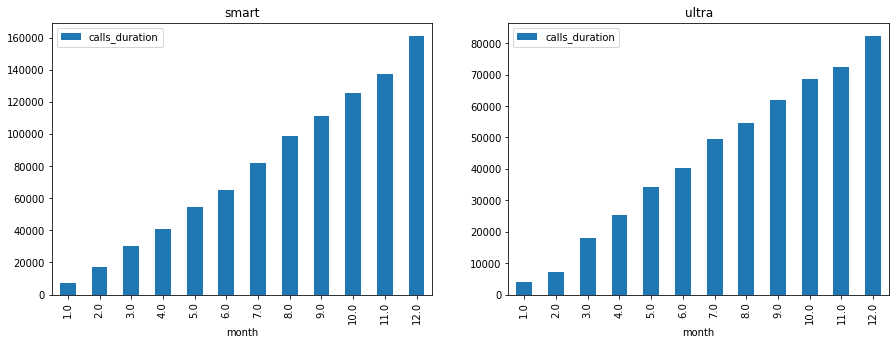

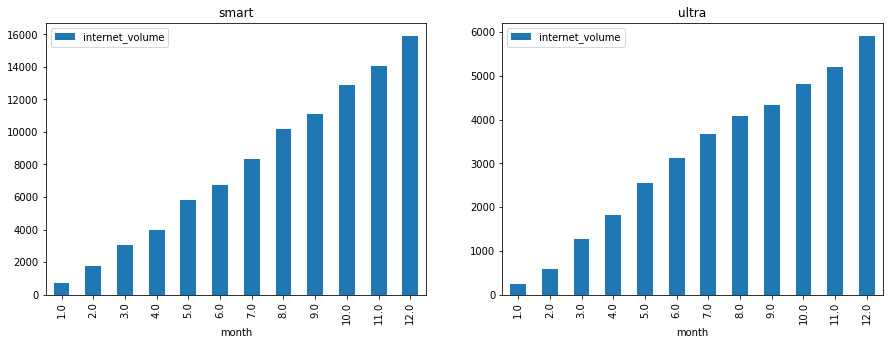

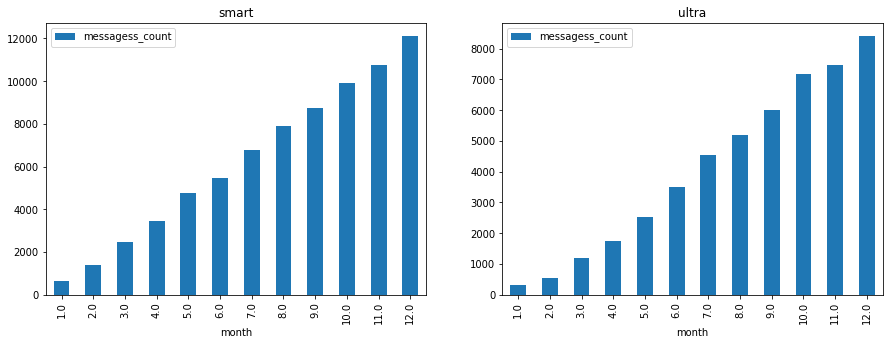

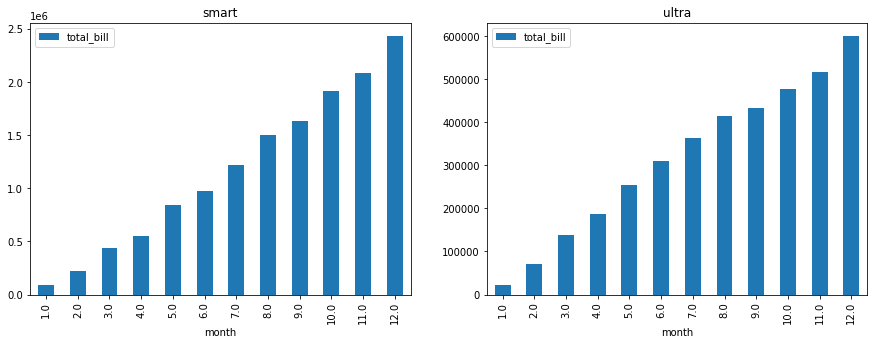

In [42]:
#Построим графики для тарифа smart и ultra
for dms_col_name in ['calls_duration', 'internet_volume', 'messagess_count', 'total_bill']:
    fig, axs = plt.subplots(1,2)
    df_month_sum[df_month_sum.index=='smart'].plot(x='month', y=dms_col_name, kind='bar', title='smart', ax=axs[0], figsize=(15, 5))
    df_month_sum[df_month_sum.index=='ultra'].plot(x='month', y=dms_col_name, kind='bar', title='ultra', ax=axs[1], figsize=(15, 5))

Как видно из графиков все параметры (количество звонков, продолжительность разговоров, количество сообщений, объем израсходованного интернет-трафика и итоговый счет) растут от января к декабрю по обоим тарифам.

Количественные параметры разные, т.к. объем выборок разный:

In [43]:
df_cmiu_pivot[df_cmiu_pivot['tariff']=='smart']['tariff'].count()

2229

In [44]:
df_cmiu_pivot[df_cmiu_pivot['tariff']=='ultra']['tariff'].count()

985

<b>Построим графики и  посчитаем среднее количество, дисперсию и стандартное отклонение для следующих параметров:</b>

In [45]:
#Продолжительность звонков
df_cmiu_pivot.groupby('tariff').agg({'calls_duration':['mean','var','std']}).style.format("{:.2f}")

<AxesSubplot:title={'center':'Продолжительность звонков'}, ylabel='Frequency'>

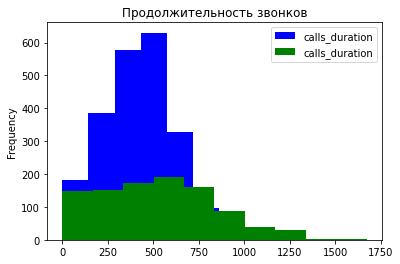

In [46]:
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'smart']['calls_duration'].plot(kind='hist', bins=10, legend = True, color='b', title='Продолжительность звонков')
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'ultra']['calls_duration'].plot(kind='hist', bins=10, legend = True, color='g')

На тарифе Смарт  большинство клиентов в месяц тратят около 450 - 500 минут, на Ультре - 500 - 550 минут в месяц. То есть на Смарте люди тратят весь пакет, а на Ультре у клиентов остается еще около 2500 минут. 

In [47]:
#Объем интернет траффика
df_cmiu_pivot.groupby('tariff').agg({'internet_volume':['mean','var','std']}).style.format("{:.2f}")

<AxesSubplot:title={'center':'Объем интернет траффика'}, ylabel='Frequency'>

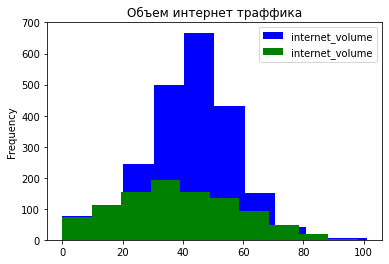

In [48]:
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'smart']['internet_volume'].plot(kind='hist', bins=10, legend = True, color='b', title='Объем интернет траффика')
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'ultra']['internet_volume'].plot(kind='hist', bins=10, legend = True, color='g')

На Смарте люди выходят за пределы тарифа чаще.

In [49]:
#Количество сообщений
df_cmiu_pivot.groupby('tariff').agg({'messagess_count':['mean','var','std']}).style.format("{:.2f}")

<AxesSubplot:title={'center':'Количество сообщений'}, ylabel='Frequency'>

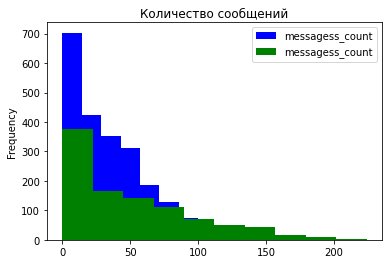

In [50]:
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'smart']['messagess_count'].plot(kind='hist', bins=10, legend = True, color='b', title='Количество сообщений')
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'ultra']['messagess_count'].plot(kind='hist', bins=10, legend = True, color='g')

Видно, что большинство клиентов как  тарифа Смарт, так и тарифа  редко пользуются смс сообщениями. 

In [51]:
#Итоговый счет
df_cmiu_pivot.groupby('tariff').agg({'total_bill':['mean','var','std']}).style.format("{:.2f}")

<AxesSubplot:title={'center':'Итоговый счет'}, ylabel='Frequency'>

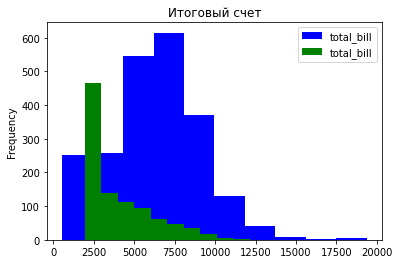

In [52]:
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'smart']['total_bill'].plot(kind='hist', bins=10, legend = True, color='b', title='Итоговый счет')
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'ultra']['total_bill'].plot(kind='hist', bins=10, legend = True, color='g')

По тарифу Ультра клиенты в основном платят по тарифу и затем небольшими группами выходят за пределы абонентской платы. По тарифу Смарт клиенты  выходят за пределы абонентской платы намного чаще.


Большую дисперсию по тарифу ультра можно объяснить меньшим объемом выборки, чем у смарт. Более высокое стандартное отклонение тарифа ультра по использованию сообщений, звонков, интернета указывает на то, что значения распределены в более широком диапазоне. 

### Шаг 4. Проверка гипотез

1.Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Сформулируем нулевую и альтернативную гипотезы:

H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;

H1 - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.

In [53]:
smart_ttest = df_cmiu_pivot[df_cmiu_pivot['tariff']=='smart']['total_bill']
ultra_ttest = df_cmiu_pivot[df_cmiu_pivot['tariff']=='ultra']['total_bill']

# уровень значимости зададим равным 5%
alpha = 0.05

results = st.ttest_ind(smart_ttest, ultra_ttest, equal_var=False) #equal_var=False так как в шаге 3 видно, что дисперсии выборок по смарт и ультра различаются

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.3661232169196476e-132
Отвергаем нулевую гипотезу


Средняя выручка пользователей тарифов Смарт и Ульра  отличаются друг от друга.

2.Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем нулевую и альтернативную гипотезы:
    
Н0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;

Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [54]:
moscow_ttest = df_cmiu_pivot[df_cmiu_pivot['city']=='Москва']['total_bill'] #Данные - Выручка пользователей из Москвы

province_mean = df_cmiu_pivot[df_cmiu_pivot['city']!='Москва']['total_bill'].mean() #Среднее значение выручки пользователе не из Москвы

# уровень значимости 5%
alpha = 0.05

results = st.ttest_1samp(moscow_ttest, province_mean)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.19642848457860967
Не получилось отвергнуть нулевую гипотезу


Средняя выручка по Москве статистически значимо не отличается от средней выручки по другим регионам.

### Шаг 5. Общий вывод

Сделав  анализ тарифов на небольшой выборке пользователей можем сделать следующие выводы:

Средние выручки тарифов смарт и ультра значимо различаются. В среднем пользователи тарифа ультра платят больше.

Средняя выручка по Москве и другим регионам значимо не различается.

СМС сообщениями мало популярны  на обоих тарифах. Клиенты тарифа Смарт близки к своим лимитам по пакету, у клиентов с тарифом  Ультра часто остаются большие "остатки" по пакету.

Выбор тарифа зависит от конкретного пользователя. Исходя из исследования, тариф ультра лучше для активных пользователей.  По тарифу ультра клиенты имеют больший пакет минут/сообщений/ интернета и в основном платят по тарифу, за пределы абонентской платы выходят редко.